<a href="https://colab.research.google.com/github/cbarton236/FinalProject/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ocean Plastic Pollution from River Sources

We are going to be looking at the top 50 rivers for plastic pollution that ends up in the oceans. All rivers that empty into the ocean contribute to the pollution but today we are only looking at the top 50 rivers.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [ ]:
os.listdir(".")

['.config', 'plastics-top-rivers.csv', 'sample_data']

In [ ]:
filename = "plastics-top-rivers.csv"
score_df = pd.read_csv(filename)
score_df.head()

,Entity,Country,sharePlastics,plasticWaste
0,Agno,Philippines,0.469647,42679
1,Agusan,Philippines,0.469647,42679
2,Bharathappuzha,India,0.357340,32517
3,Cagayan River,Philippines,0.234824,21368
4,Cagayan de Oro,Philippines,0.265453,24156


Looking at the csv we see that we are only working with four columns of data. This is going to be less focused on checking data viablility and more about exploring what the data has to offer.

In [ ]:
score_df.rename(columns={"Entity":"River", "sharePlastics":"globalPercentage"},inplace=True)
score_df.head()

,River,Country,globalPercentage,plasticWaste
0,Agno,Philippines,0.469647,42679
1,Agusan,Philippines,0.469647,42679
2,Bharathappuzha,India,0.357340,32517
3,Cagayan River,Philippines,0.234824,21368
4,Cagayan de Oro,Philippines,0.265453,24156


In [ ]:
score_df.dtypes

River                object
Country              object
globalPercentage    float64
plasticWaste          int64
dtype: object

In [ ]:
print (score_df)

                     River             Country  globalPercentage  plasticWaste
0                     Agno         Philippines          0.469647         42679
1                   Agusan         Philippines          0.469647         42679
2           Bharathappuzha               India          0.357340         32517
3            Cagayan River         Philippines          0.234824         21368
4           Cagayan de Oro         Philippines          0.265453         24156
5              Chao Phraya            Thailand          0.408389         37163
6           Chenzhen River               China          0.296082         26943
7            Chilyar River               India          0.234824         21368
8                Cilliwung           Indonesia          0.285872         26014
9              Davao River         Philippines          0.265453         24156
10          Douala Estuary            Cameroon          0.234824         21368
11            Ebrie Lagoon       Cote d'Ivoire      

In [ ]:
countries = score_df.groupby(['Country']).sum()
countries

,globalPercentage,plasticWaste
Country,,
Bangladesh,0.265453,24156
Brazil,0.265453,24156
Cameroon,0.520696,47382
China,0.918876,83617
Cote d'Ivoire,0.336921,30659
Dominican Republic,0.224614,20439
India,3.940955,358622
Indonesia,0.285872,26014
Malaysia,2.429915,221120


Now that we have the waste by volume we can start to see how much trash is being added to the ocean each year as both a total and from different rivers and countries.

In [ ]:
sumScores = score_df['plasticWaste'].sum()
sumScores

2456361

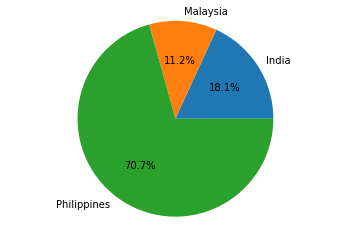

In [ ]:
countryList = ['India', 'Malaysia', 'Philippines']
wasteAmount = [358622, 221120, 1396289]
SumTopThree = 1976031
fig, ax = plt.subplots()
ax.pie(wasteAmount, labels = countryList, autopct='%1.1f%%')

ax.axis('equal')

plt.show()

Out of the top 3 countries that contribute to plastic pollution the most the Plilippines contributes the most plastic waste into their rivers. Let's take a closer look at the Philippines to see where exactly the waste is coming from.

In [ ]:
score_df.sort_values(by='Country', ascending=True)

,River,Country,globalPercentage,plasticWaste
19,Karnaphuli,Bangladesh,0.265453,24156
39,Rio Pavuna,Brazil,0.265453,24156
10,Douala Estuary,Cameroon,0.234824,21368
46,Wouri River,Cameroon,0.285872,26014
14,Huangpu,China,0.367550,33447
6,Chenzhen River,China,0.296082,26943
49,Zhujiang,China,0.255243,23227
11,Ebrie Lagoon,Cote d'Ivoire,0.336921,30659
38,Rio Ozama,Dominican Republic,0.224614,20439
7,Chilyar River,India,0.234824,21368


<BarContainer object of 16 artists>

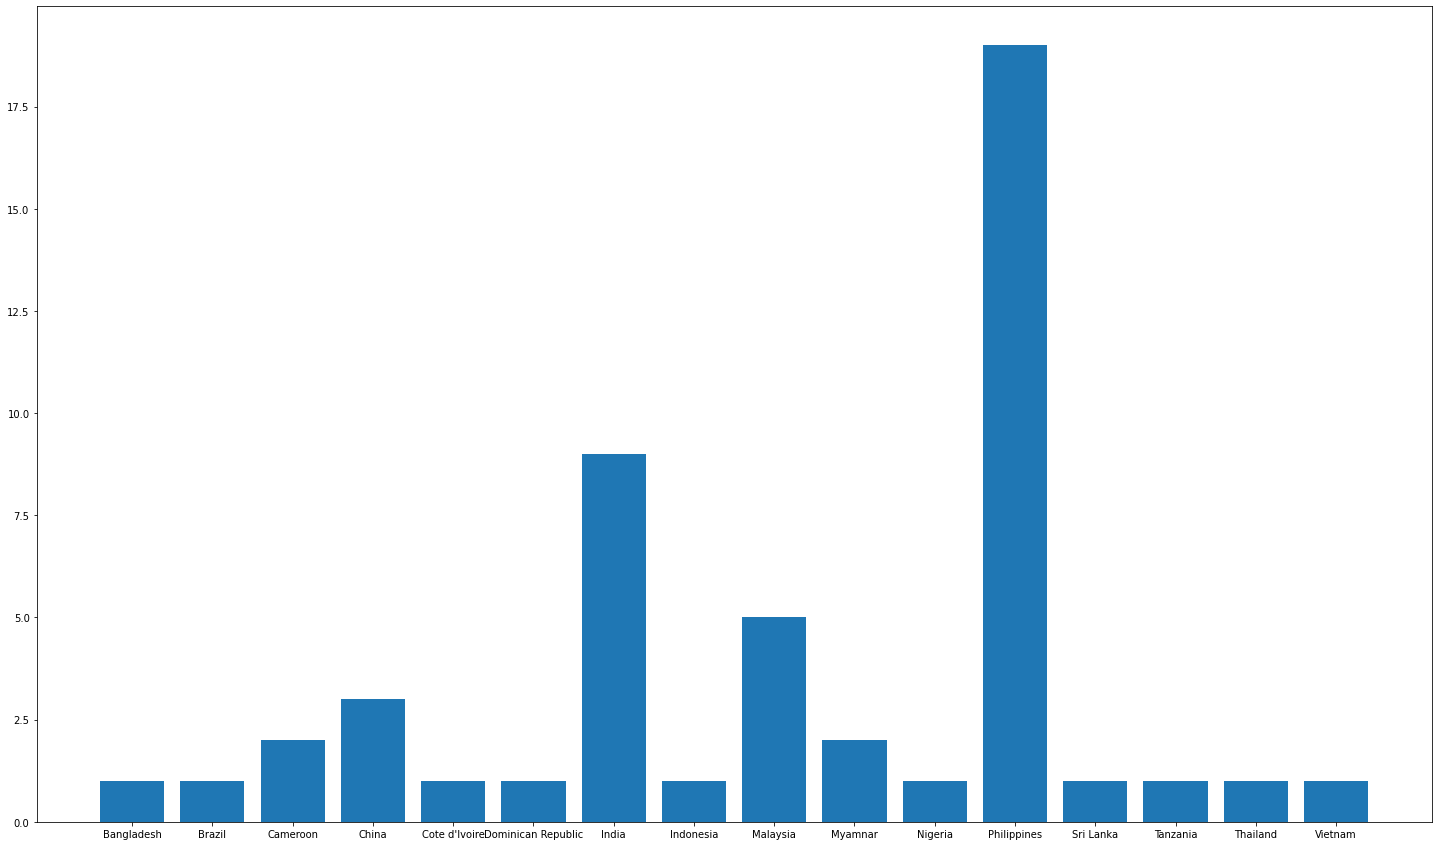

In [ ]:
countryList = ['Bangladesh', 'Brazil', 'Cameroon', 'China', "Cote d'Ivoire", 'Dominican Republic', 'India', 'Indonesia', 'Malaysia', 'Myamnar', 'Nigeria', 'Philippines', 'Sri Lanka', 'Tanzania', 'Thailand', 'Vietnam']
numberRivers = [1, 1, 2, 3, 1, 1, 9, 1, 5, 2, 1, 19, 1, 1, 1, 1]

plt.figure(figsize=(25, 15))
display(plt.bar(countryList, numberRivers))

It appears that the amount of rivers does influence if a country contributes to more pollution. In order to develop this further more data would be needed. We would need the data for every river that empties into the ocean. This is something that I want to continue to work on and as more data becoms available I will add to this. Once data from every river in the world that empties into an ocean is available I also want to include an interactive map. This map would allow the user to see what rivers are in a country as well as relevant data like how much plastic enters the ocean from that river yearly.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


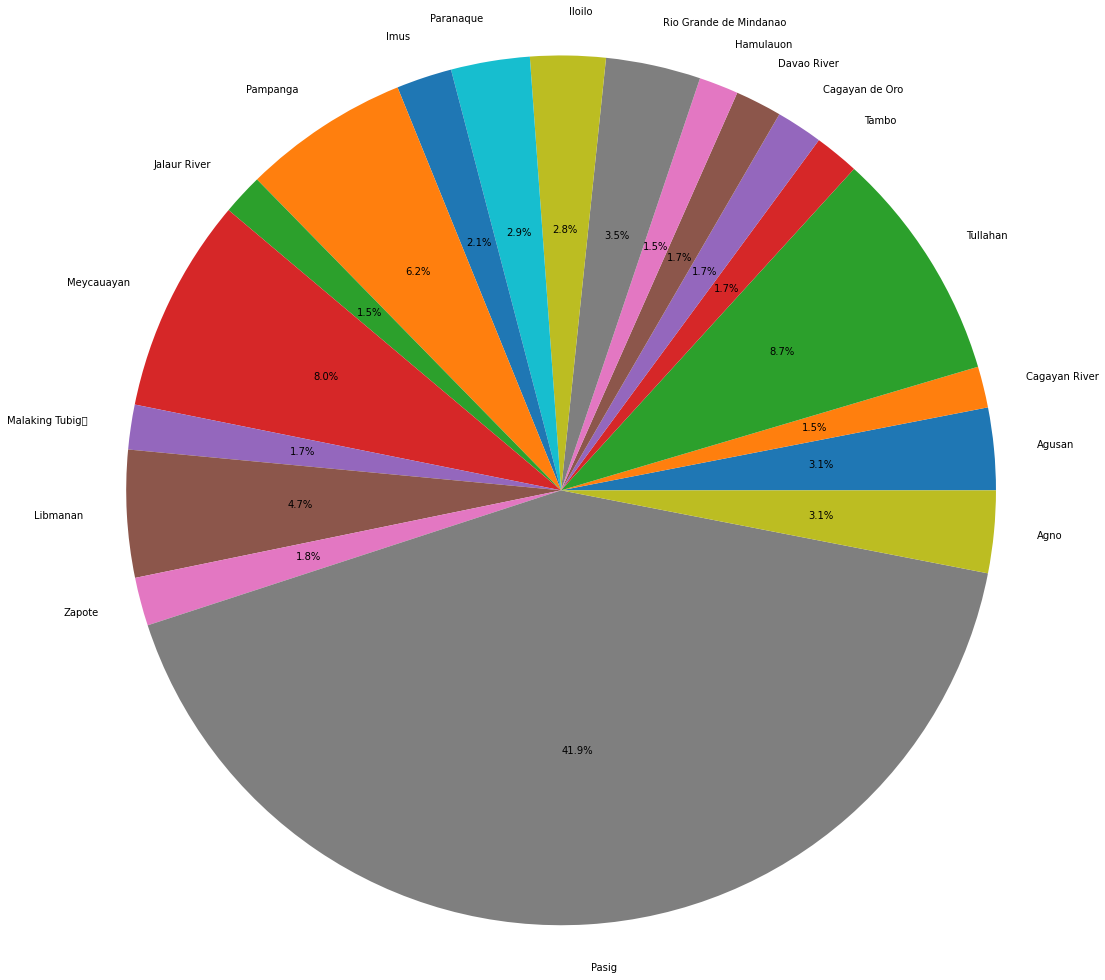

In [ ]:
riverList = ['Agusan', 'Cagayan River', 'Tullahan', 'Tambo', 'Cagayan de Oro', 'Davao River', 'Hamulauon', 'Rio Grande de Mindanao', 'Iloilo', 'Paranaque', 'Imus', 'Pampanga', 'Jalaur River', 'Meycauayan', 'Malaking Tubig	', 'Libmanan', 'Zapote', 'Pasig', 'Agno']
plasticWaste = [42679, 21368, 120781, 23227, 24156, 24156, 20439, 49241, 39021, 40879, 28801, 86404, 21368, 111490, 23227, 65965, 25085, 585323, 42679]

fig, ax = plt.subplots()
ax.pie(plasticWaste, labels = riverList, autopct='%1.1f%%', radius = 5)

plt.show()

The Pasig River is the culprit for most of the pollution from the Philippines. Further research is needed to determine the cause of this rivers contribution to pollution.